In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14, 8)})

In [2]:
def scoring(clusterization, y_true, X):
    print(f'Number of clusters: {len(np.unique(y_true))} Estimated number of clusters: {len(np.unique(clusterization.labels_))}')
    print(f'Adjusted rand score: {metrics.adjusted_rand_score(y_true, clusterization.labels_)}')
    print(f'Adjusted mutual information: {metrics.adjusted_mutual_info_score(y_true, clusterization.labels_)}')
    print(f'Silhouette coefficient: {metrics.silhouette_score(X, clusterization.labels_)}')

In [3]:
from sklearn.datasets._samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X1, labels_true = make_blobs(n_samples=75000,
                             centers=centers, cluster_std=0.4, random_state=0)

X = StandardScaler().fit_transform(X1)

<AxesSubplot:>

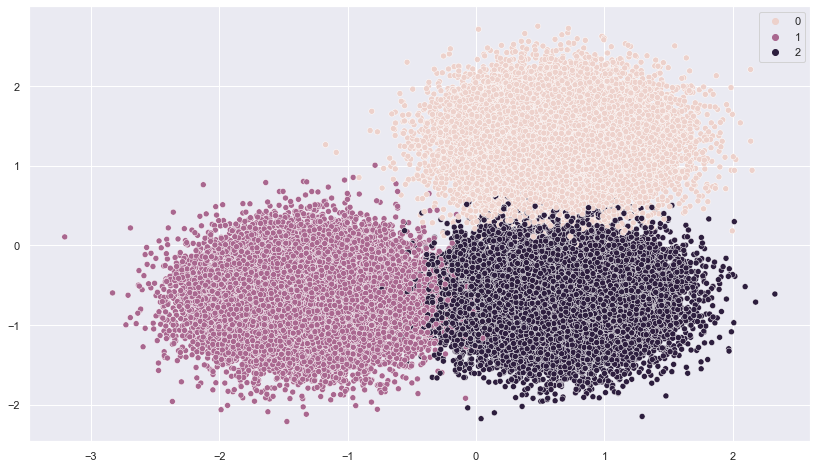

In [4]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels_true)

In [5]:
from sklearn.cluster import MeanShift

clustering = MeanShift(n_jobs=-1)

In [6]:
%%time
clustering.fit(X)

Wall time: 6min 46s


MeanShift(n_jobs=-1)

<AxesSubplot:>

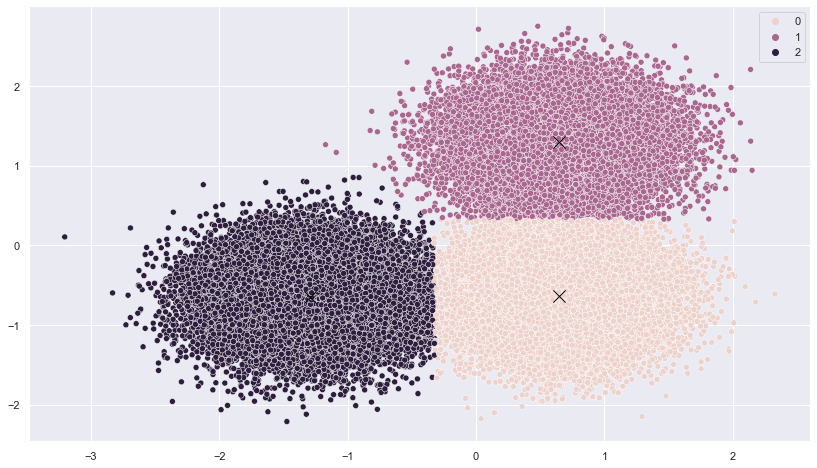

In [7]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)
sns.scatterplot(x=clustering.cluster_centers_[:, 0], y=clustering.cluster_centers_[:, 1], s=150, ec='black', marker='x')

In [8]:
scoring(clustering, labels_true, X)

Number of clusters: 3 Estimated number of clusters: 3
Adjusted rand score: -3.1248788075495826


c:\Users\Kidma\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:389: RuntimeWarning: overflow encountered in longlong_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) +


Silhouette coefficient: 0.63436773193712


Проблеми з розрахуванням 'Adjusted rand score' та 'Adjusted mutual information', у чому причина не знаю, 'Adjusted rand score' повинен мати гарні результати, а отримали ми негативне значення, якась помилка обчислення яка не вирішується, тому будемо візуально визначати наскільки гарно алгоритм спрацював <br>
Знайшов правильну кількість кластерів і на вигляд дуже гарно розподілив їх, порівняно гарне значення 'silhouette', ???що означає, що кластери щільні і гарно розділені??? (поясніть будь-ласка чи правильні мої судження)

Дізнаємося bandwidth і завдяки цьому будемо трохи змінювати значення параметру і намагатися отримати результати краще

In [9]:
from sklearn.cluster import estimate_bandwidth

estimate_bandwidth(X, n_jobs=-1)

1.0492883573380394

bandwidth = 1

In [10]:
clustering = MeanShift(bandwidth=1, n_jobs=-1)

In [11]:
%%time
clustering.fit(X)

Wall time: 3min 25s


MeanShift(bandwidth=1, n_jobs=-1)

<AxesSubplot:>

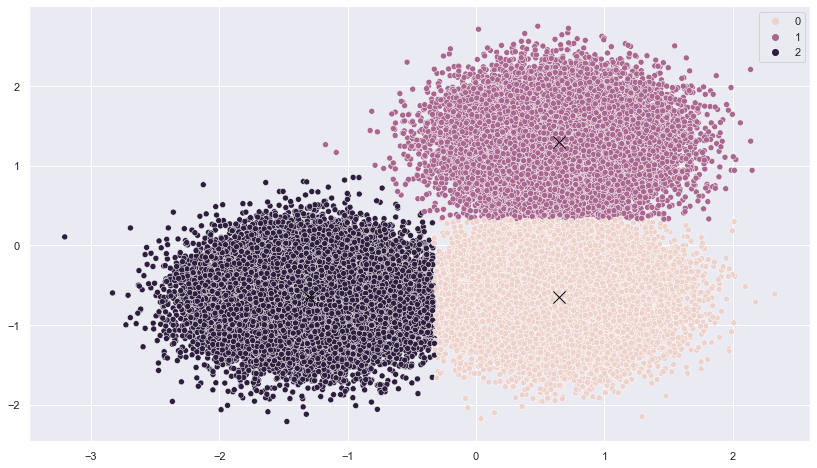

In [12]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)
sns.scatterplot(x=clustering.cluster_centers_[:, 0], y=clustering.cluster_centers_[:, 1], s=150, ec='black', marker='x')

In [13]:
scoring(clustering, labels_true, X)

Number of clusters: 3 Estimated number of clusters: 3
Adjusted rand score: -3.1248785522690503


c:\Users\Kidma\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:389: RuntimeWarning: overflow encountered in longlong_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) +


Silhouette coefficient: 0.634370279836152


bandwidth = 1.1

In [14]:
clustering = MeanShift(bandwidth=1.1, n_jobs=-1)

In [15]:
%%time
clustering.fit(X)

Wall time: 4min 4s


MeanShift(bandwidth=1.1, n_jobs=-1)

<AxesSubplot:>

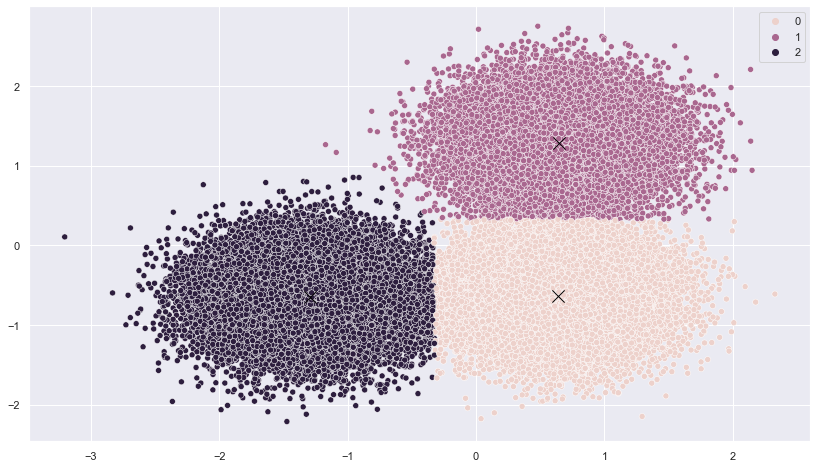

In [16]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)
sns.scatterplot(x=clustering.cluster_centers_[:, 0], y=clustering.cluster_centers_[:, 1], s=150, ec='black', marker='x')

In [17]:
scoring(clustering, labels_true, X)

Number of clusters: 3 Estimated number of clusters: 3
Adjusted rand score: -3.1247530044202456


c:\Users\Kidma\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:389: RuntimeWarning: overflow encountered in longlong_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) +


Silhouette coefficient: 0.634367305304913


Коментувати усі результати не має сенсу, вони усі +- однакові, не отримали значень сильно краще

Вилучимо деякі об'єкти з вибірки:

In [18]:
np.random.seed(10)
random_index = np.random.randint(0, 74999, 10000)
X = np.delete(X, random_index, axis=0)
y = np.delete(labels_true, random_index, axis=0)

In [19]:
clustering = MeanShift(bandwidth=1, n_jobs=-1)

In [20]:
%%time
clustering.fit(X)

Wall time: 2min 55s


MeanShift(bandwidth=1, n_jobs=-1)

<AxesSubplot:>

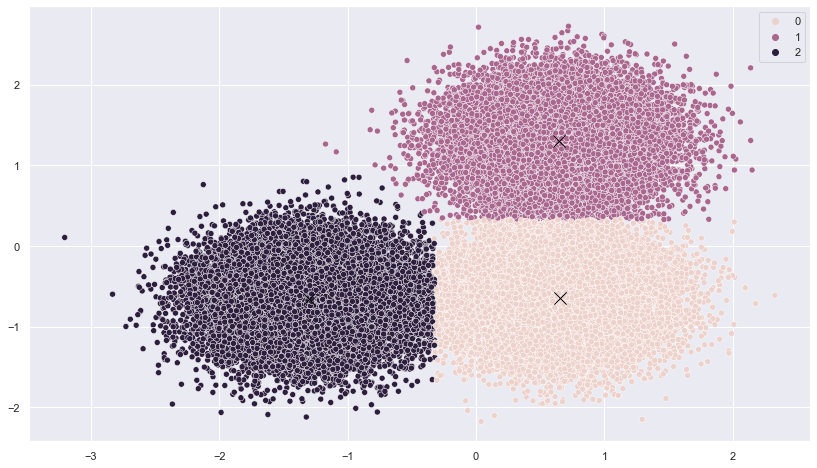

In [21]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)
sns.scatterplot(x=clustering.cluster_centers_[:, 0], y=clustering.cluster_centers_[:, 1], s=150, ec='black', marker='x')

In [22]:
scoring(clustering, y, X)

Number of clusters: 3 Estimated number of clusters: 3
Adjusted rand score: 0.9747851059997785
Silhouette coefficient: 0.6346372135627961


Після видалення об'єктів ми отримали результати краще, чомусь тут помилка розрахунку не зв'явилася і ми можемо +- подивитися на значення метрик які повинні були бути вище, Adjusted rand score дуже високе, 'silhouette' також має достатнє значення

Висновки: </br>
Для цього набору даних це мабуть один із найкращих алгоритмів кластеризації, ми отримали розподілення з adjusted rand score приблизно 0.95, але цей алгоритм дуже повільний!

